In [1]:
%matplotlib widget
# Import necessary libraries
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import contextily as ctx
import pyproj
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Define number of sample rows
n = 50

# Create a fixed datetime value for all rows
time_val = pd.Timestamp("2020-01-01 12:00:00")

# Create the test DataFrame with columns:
# "time", "lon", "lat", and some physical quantities
df = pl.DataFrame({
    "time": [time_val] * n,
    "lon": np.random.uniform(-100, -90, n).tolist(),
    "lat": np.random.uniform(40, 50, n).tolist(),
    "temp": np.random.uniform(10, 30, n).tolist(),       # Temperature between 10 and 30
    "perc": np.random.uniform(0, 100, n).tolist(),         # Precipitation between 0 and 100
    "humidity": np.random.uniform(30, 100, n).tolist(),      # Humidity between 30 and 100
    "wind_speed": np.random.uniform(0, 20, n).tolist(),      # Wind speed between 0 and 20
    "insol": np.random.uniform(0, 10, n).tolist()            # Insolation between 0 and 10
})

print(df)

data_selector = {'lon': -90.492857, 'lat': 47.751328, 'time': df['time'][0]}


shape: (50, 8)
┌─────────────┬────────────┬───────────┬───────────┬───────────┬───────────┬────────────┬──────────┐
│ time        ┆ lon        ┆ lat       ┆ temp      ┆ perc      ┆ humidity  ┆ wind_speed ┆ insol    │
│ ---         ┆ ---        ┆ ---       ┆ ---       ┆ ---       ┆ ---       ┆ ---        ┆ ---      │
│ datetime[μs ┆ f64        ┆ f64       ┆ f64       ┆ f64       ┆ f64       ┆ f64        ┆ f64      │
│ ]           ┆            ┆           ┆           ┆           ┆           ┆            ┆          │
╞═════════════╪════════════╪═══════════╪═══════════╪═══════════╪═══════════╪════════════╪══════════╡
│ 2020-01-01  ┆ -96.254599 ┆ 49.695846 ┆ 10.628584 ┆ 90.826589 ┆ 74.942215 ┆ 5.888978   ┆ 0.516817 │
│ 12:00:00    ┆            ┆           ┆           ┆           ┆           ┆            ┆          │
│ 2020-01-01  ┆ -90.492857 ┆ 47.751328 ┆ 22.728208 ┆ 23.956189 ┆ 35.889798 ┆ 7.701955   ┆ 5.313546 │
│ 12:00:00    ┆            ┆           ┆           ┆           ┆           ┆

In [4]:
from plot_map_view import InteractiveMapPlotter

ConnectionError: HTTPSConnectionPool(host='a.tile.openstreetmap.fr', port=443): Max retries exceeded with url: /hot/6/14/21.png (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x778ae47047d0>: Failed to resolve 'a.tile.openstreetmap.fr' ([Errno -2] Name or service not known)"))

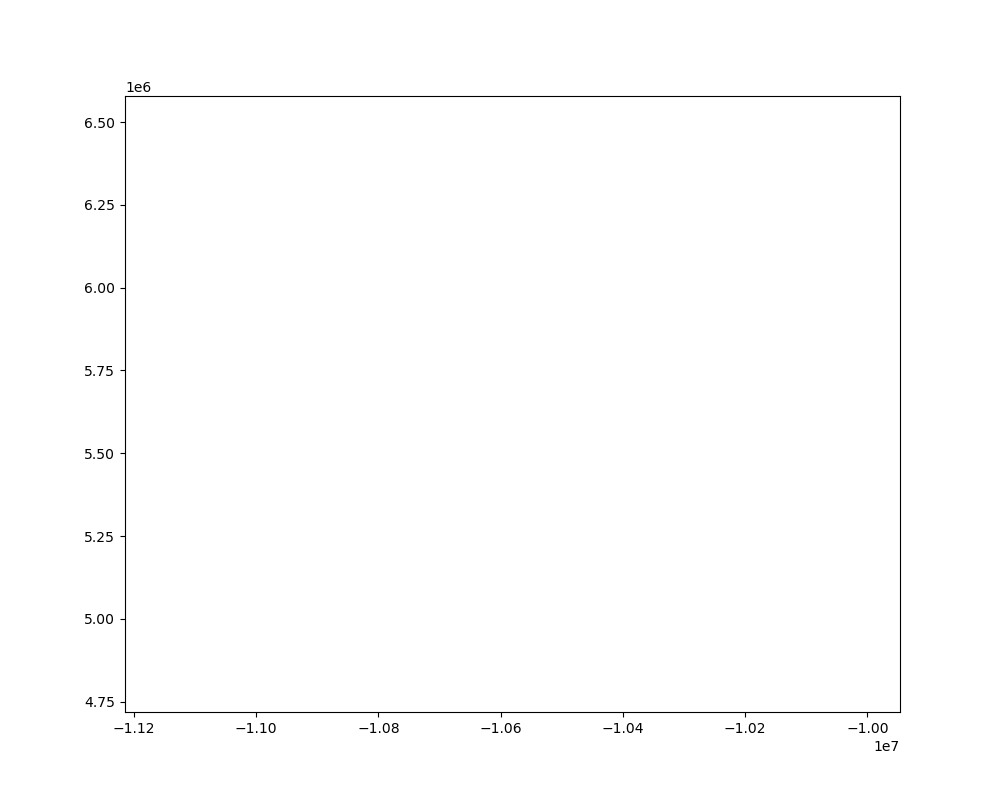

In [5]:


# Create an instance of the InteractiveMapPlotter
plotter = InteractiveMapPlotter(df, data_selector)


In [ ]:
import plot_time_zoom as tzoom

tzoom
# todo time zoom with zarr dataset source
# use day avarages, no slices (chaotic)
# can choose eiither tim of day slices, 
zoom_plot_df()